# Library Import

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import load_boston

# Quiz) crime_in_Seoul.csv

```
1. 살인발생이 가장높은 관서명, 살인발생,살인검거를 출력하시오.
2. 관서별 절도발생,절도검거에 대한 바차트를 그리시오.
3. 절도검거율 컬럼을 추가 하시오.
4. 폭력발생 top5를 구하시오.( 관서명, 폭력발생, 폭력검거)
5. 상관관계 heatmap을 그리시오.
6. 살인발생과 폭력발생의 상관관계를 확인하고 살인 발생이 5건인경우 폭력발생수를 예측하시오.
( 텐서버전, 케라스버전)
```

# 풀이

## 1번) 살인발생이 가장높은 관서명, 살인발생,살인검거를 출력하시오.

In [5]:
df_crime = pd.read_csv('data/crime_in_Seoul.csv', encoding ='cp949')
df_crime

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711"
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861
5,용산서,5,5,14,14,194,173,"1,557",587,"2,050","1,704"
6,성북서,2,2,2,1,86,71,953,409,"1,194","1,015"
7,동대문서,5,5,13,13,173,146,"1,981",814,"2,548","2,227"
8,마포서,8,8,14,10,294,247,"2,555",813,"2,983","2,519"
9,영등포서,14,12,22,20,295,183,"2,964",978,"3,572","2,961"


In [10]:
df_crime[df_crime['살인 발생'] == df_crime['살인 발생'].max()].loc[:,['관서명', '살인 발생', '살인 검거']]

,관서명,살인 발생,살인 검거
9,영등포서,14,12


## 2번) 관서별 절도발생,절도검거에 대한 바차트를 그리시오.

In [12]:
import seaborn as sns

In [14]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     object
 8   절도 검거   31 non-null     object
 9   폭력 발생   31 non-null     object
 10  폭력 검거   31 non-null     object
dtypes: int64(6), object(5)
memory usage: 2.8+ KB


In [47]:
df_crime['절도 발생'] = df_crime['절도 발생'].apply(lambda x: x.replace(',', ''))
df_crime['절도 발생'] = pd.to_numeric(df_crime['절도 발생'])
df_crime

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,1070,413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,"2,056","1,711"
4,혜화서,3,2,5,4,96,63,1114,424,"1,015",861
5,용산서,5,5,14,14,194,173,1557,587,"2,050","1,704"
6,성북서,2,2,2,1,86,71,953,409,"1,194","1,015"
7,동대문서,5,5,13,13,173,146,1981,814,"2,548","2,227"
8,마포서,8,8,14,10,294,247,2555,813,"2,983","2,519"
9,영등포서,14,12,22,20,295,183,2964,978,"3,572","2,961"


In [48]:
df_crime['절도 검거'] = df_crime['절도 검거'].apply(lambda x: x.replace(',', ''))
df_crime['절도 검거'] = pd.to_numeric(df_crime['절도 검거'])
df_crime

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,1070,413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,"2,056","1,711"
4,혜화서,3,2,5,4,96,63,1114,424,"1,015",861
5,용산서,5,5,14,14,194,173,1557,587,"2,050","1,704"
6,성북서,2,2,2,1,86,71,953,409,"1,194","1,015"
7,동대문서,5,5,13,13,173,146,1981,814,"2,548","2,227"
8,마포서,8,8,14,10,294,247,2555,813,"2,983","2,519"
9,영등포서,14,12,22,20,295,183,2964,978,"3,572","2,961"


In [50]:
df_crime['폭력 발생'] = df_crime['폭력 발생'].apply(lambda x: x.replace(',', ''))
df_crime['폭력 발생'] = pd.to_numeric(df_crime['폭력 발생'])
df_crime

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,"1,170"
1,종로서,3,3,6,5,115,98,1070,413,1278,"1,070"
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,"1,711"
4,혜화서,3,2,5,4,96,63,1114,424,1015,861
5,용산서,5,5,14,14,194,173,1557,587,2050,"1,704"
6,성북서,2,2,2,1,86,71,953,409,1194,"1,015"
7,동대문서,5,5,13,13,173,146,1981,814,2548,"2,227"
8,마포서,8,8,14,10,294,247,2555,813,2983,"2,519"
9,영등포서,14,12,22,20,295,183,2964,978,3572,"2,961"


In [51]:
df_crime['폭력 검거'] = df_crime['폭력 검거'].apply(lambda x: x.replace(',', ''))
df_crime['폭력 검거'] = pd.to_numeric(df_crime['폭력 검거'])
df_crime

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861
5,용산서,5,5,14,14,194,173,1557,587,2050,1704
6,성북서,2,2,2,1,86,71,953,409,1194,1015
7,동대문서,5,5,13,13,173,146,1981,814,2548,2227
8,마포서,8,8,14,10,294,247,2555,813,2983,2519
9,영등포서,14,12,22,20,295,183,2964,978,3572,2961


In [52]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     int64 
 8   절도 검거   31 non-null     int64 
 9   폭력 발생   31 non-null     int64 
 10  폭력 검거   31 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.8+ KB


In [73]:
# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  폰트사이즈 변경
plt.rcParams['font.size'] = 11.0
#  한글글꼴로 변경
## plt.rcParams['font.family'] = '한글글꼴명'
## plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.labelsize'] = 25

In [178]:
graph = df_crime[['관서명', '절도 발생', '절도 검거']]
graph.set_index('관서명', inplace=True)
graph

,절도 발생,절도 검거
관서명,,
중부서,1395,477
종로서,1070,413
남대문서,1153,382
서대문서,1812,738
혜화서,1114,424
용산서,1557,587
성북서,953,409
동대문서,1981,814
마포서,2555,813


<AxesSubplot:xlabel='관서명'>

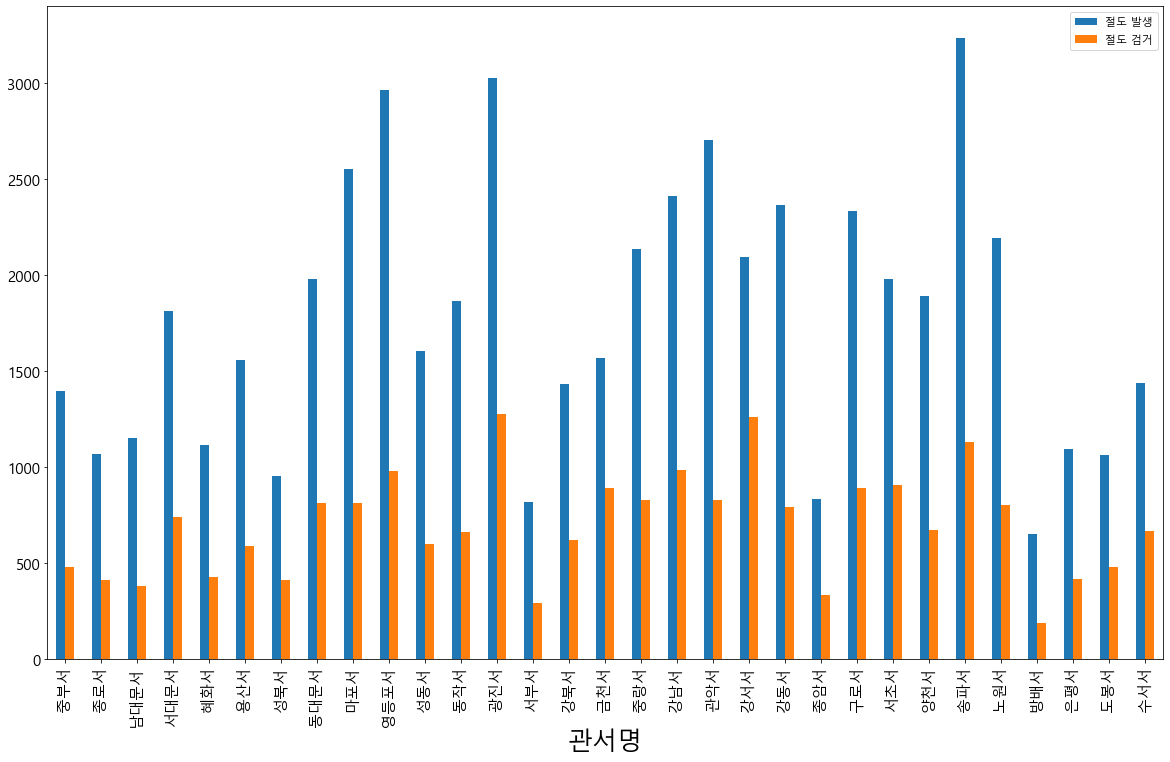

In [180]:
graph.plot(kind='bar')

## 3번) 절도검거율 컬럼을 추가 하시오

In [83]:
df_crime['절도 검거'] / df_crime['절도 발생']

0     0.341935
1     0.385981
2     0.331310
3     0.407285
4     0.380610
5     0.377007
6     0.429171
7     0.410904
8     0.318200
9     0.329960
10    0.371500
11    0.354424
12    0.422009
13    0.357753
14    0.430962
15    0.566688
16    0.388290
17    0.408129
18    0.305617
19    0.601145
20    0.333474
21    0.399038
22    0.380728
23    0.456609
24    0.355556
25    0.348564
26    0.365253
27    0.284839
28    0.381735
29    0.449671
30    0.462821
dtype: float64

In [84]:
df_crime['절도 검거율'] = df_crime['절도 검거'] / df_crime['절도 발생']
df_crime

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,절도 검거율
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,0.341935
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,0.385981
2,남대문서,1,0,6,4,65,46,1153,382,869,794,0.331310
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,0.407285
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,0.380610
5,용산서,5,5,14,14,194,173,1557,587,2050,1704,0.377007
6,성북서,2,2,2,1,86,71,953,409,1194,1015,0.429171
7,동대문서,5,5,13,13,173,146,1981,814,2548,2227,0.410904
8,마포서,8,8,14,10,294,247,2555,813,2983,2519,0.318200
9,영등포서,14,12,22,20,295,183,2964,978,3572,2961,0.329960


## 4번) 폭력발생 top5를 구하시오(관서명, 폭력발생, 폭력검거)

In [98]:
df_crime.iloc[df_crime['폭력 발생'].sort_values(ascending=False)[:5].index.values,:].loc[:, ["관서명", "폭력 발생", "폭력 검거"]]

,관서명,폭력 발생,폭력 검거
9,영등포서,3572,2961
18,관악서,3298,2642
25,송파서,3295,2786
19,강서서,3207,2718
22,구로서,3007,2432


## 5번) 상관관계 heatmap을 그리시오

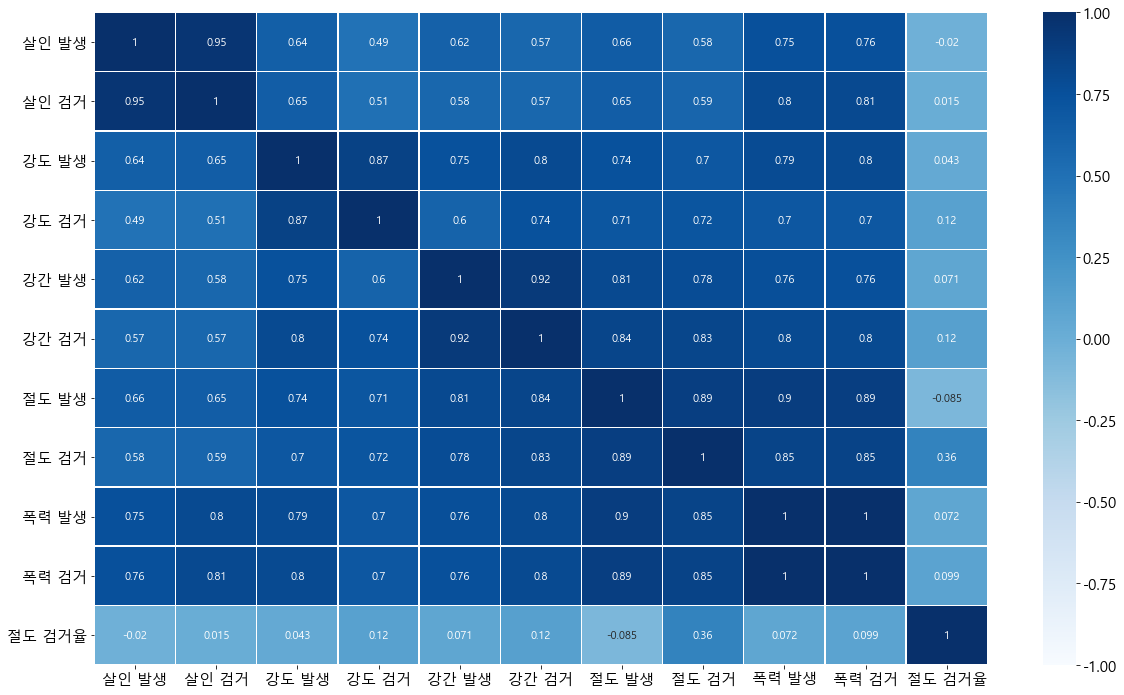

In [104]:
sns.heatmap( df_crime.corr(), vmin=-1, vmax=1,
            annot=True,
            linewidths=0.4,
            cmap='Blues'
          )

plt.show()

## 6번) 살인발생과 폭력발생의 상관관계를 확인하고, 살인발생이 5건인 경우, 폭력발생수를 예측하시오

In [107]:
df_crime2 = df_crime[['살인 발생', '폭력 발생']]
df_crime2

,살인 발생,폭력 발생
0,2,1355
1,3,1278
2,1,869
3,2,2056
4,3,1015
5,5,2050
6,2,1194
7,5,2548
8,8,2983
9,14,3572


In [108]:
df_crime2.corr()

,살인 발생,폭력 발생
살인 발생,1.000000,0.754575
폭력 발생,0.754575,1.000000


In [157]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_crime2)

StandardScaler()

In [158]:
df_crime2_scaled = scaler.transform(df_crime2)

In [159]:
df_crime2_scaled = pd.DataFrame(data=df_crime2_scaled, columns=df_crime2.columns) # 데이터와 컬럼을 어떻게 넣어줬는지 잘 봐라
df_crime2_scaled.head(5)

,살인 발생,폭력 발생
0,-0.918637,-0.917674
1,-0.636679,-1.012088
2,-1.200595,-1.513583
3,-0.918637,-0.058143
4,-0.636679,-1.334565


In [185]:
scaler.transform([[5,0]])

array([[-0.07276336, -2.57910712]])

### Tensor version

In [160]:
from tensorflow.keras.optimizers import Adam

In [163]:
x_data = df_crime2_scaled['살인 발생'].values
y_data = df_crime2_scaled['폭력 발생'].values

In [164]:
x = tf.constant(x_data, tf.float32)
y = tf.constant(y_data, tf.float32)

In [165]:
w = tf.Variable( tf.random.uniform([1]) )
b = tf.Variable( tf.random.uniform([1]) )

In [166]:
def compute_cost():
    hx = w*x + b
    cost = tf.reduce_mean( (hx-y)**2 )
    return cost

In [167]:
optimizer = Adam(learning_rate=0.1)
hist_cost = []

for i in range(2000):
    optimizer.minimize( compute_cost, var_list=[w,b] )
    c = compute_cost().numpy()
    hist_cost.append(c)          # cost func. 값을 전부 다 담아서 나중에 그래프 그려보려고
    print(i, "cost=", c)

0 cost= 1.103881
1 cost= 0.95227754
2 cost= 0.81755024
3 cost= 0.70543844
4 cost= 0.61585057
5 cost= 0.54509467
6 cost= 0.49202654
7 cost= 0.45679098
8 cost= 0.43786898
9 cost= 0.4316854
10 cost= 0.43456566
11 cost= 0.44388297
12 cost= 0.45730805
13 cost= 0.47204798
14 cost= 0.48520556
15 cost= 0.49486867
16 cost= 0.5004529
17 cost= 0.5020658
18 cost= 0.49987656
19 cost= 0.49416214
20 cost= 0.48571378
21 cost= 0.47579277
22 cost= 0.46560684
23 cost= 0.45593902
24 cost= 0.44728288
25 cost= 0.44014254
26 cost= 0.43498862
27 cost= 0.43196622
28 cost= 0.4308079
29 cost= 0.4310812
30 cost= 0.43242455
31 cost= 0.4344984
32 cost= 0.43684775
33 cost= 0.43896827
34 cost= 0.44051945
35 cost= 0.44139048
36 cost= 0.4415684
37 cost= 0.44104472
38 cost= 0.4398856
39 cost= 0.4382998
40 cost= 0.43655387
41 cost= 0.4348453
42 cost= 0.43329915
43 cost= 0.43203855
44 cost= 0.43117565
45 cost= 0.43073523
46 cost= 0.4306471
47 cost= 0.43082044
48 cost= 0.43118146
49 cost= 0.43163994
50 cost= 0.43207923
51 

443 cost= 0.43061653
444 cost= 0.4306166
445 cost= 0.43061653
446 cost= 0.4306166
447 cost= 0.4306166
448 cost= 0.4306166
449 cost= 0.4306166
450 cost= 0.4306166
451 cost= 0.43061653
452 cost= 0.43061653
453 cost= 0.43061653
454 cost= 0.43061653
455 cost= 0.43061653
456 cost= 0.43061653
457 cost= 0.43061653
458 cost= 0.43061653
459 cost= 0.43061653
460 cost= 0.43061653
461 cost= 0.43061653
462 cost= 0.43061653
463 cost= 0.43061653
464 cost= 0.43061653
465 cost= 0.43061653
466 cost= 0.43061653
467 cost= 0.43061653
468 cost= 0.43061653
469 cost= 0.43061653
470 cost= 0.43061653
471 cost= 0.4306166
472 cost= 0.4306166
473 cost= 0.4306166
474 cost= 0.4306166
475 cost= 0.4306166
476 cost= 0.43061653
477 cost= 0.4306166
478 cost= 0.43061653
479 cost= 0.4306166
480 cost= 0.43061653
481 cost= 0.4306166
482 cost= 0.43061653
483 cost= 0.4306166
484 cost= 0.43061653
485 cost= 0.4306166
486 cost= 0.43061653
487 cost= 0.4306166
488 cost= 0.43061653
489 cost= 0.43061653
490 cost= 0.43061656
491 cost=

905 cost= 0.43061653
906 cost= 0.43061656
907 cost= 0.43061656
908 cost= 0.43061656
909 cost= 0.43061653
910 cost= 0.43061656
911 cost= 0.43061656
912 cost= 0.43061653
913 cost= 0.43061656
914 cost= 0.43061653
915 cost= 0.43061653
916 cost= 0.43061656
917 cost= 0.43061653
918 cost= 0.43061656
919 cost= 0.43061653
920 cost= 0.43061653
921 cost= 0.43061656
922 cost= 0.43061653
923 cost= 0.43061653
924 cost= 0.43061653
925 cost= 0.43061653
926 cost= 0.43061653
927 cost= 0.43061656
928 cost= 0.43061653
929 cost= 0.43061656
930 cost= 0.4306166
931 cost= 0.43061653
932 cost= 0.43061653
933 cost= 0.4306166
934 cost= 0.43061656
935 cost= 0.43061653
936 cost= 0.4306166
937 cost= 0.43061656
938 cost= 0.43061656
939 cost= 0.43061653
940 cost= 0.43061656
941 cost= 0.43061656
942 cost= 0.43061653
943 cost= 0.43061656
944 cost= 0.43061656
945 cost= 0.43061653
946 cost= 0.43061656
947 cost= 0.43061653
948 cost= 0.43061656
949 cost= 0.43061653
950 cost= 0.43061656
951 cost= 0.43061653
952 cost= 0.4306

1291 cost= 0.43061656
1292 cost= 0.43061653
1293 cost= 0.4306165
1294 cost= 0.43061656
1295 cost= 0.43061653
1296 cost= 0.43061653
1297 cost= 0.43061653
1298 cost= 0.43061656
1299 cost= 0.43061653
1300 cost= 0.43061653
1301 cost= 0.43061656
1302 cost= 0.43061653
1303 cost= 0.43061656
1304 cost= 0.43061653
1305 cost= 0.43061656
1306 cost= 0.43061656
1307 cost= 0.43061653
1308 cost= 0.43061656
1309 cost= 0.4306165
1310 cost= 0.43061656
1311 cost= 0.43061656
1312 cost= 0.43061656
1313 cost= 0.43061656
1314 cost= 0.43061653
1315 cost= 0.43061653
1316 cost= 0.43061653
1317 cost= 0.43061656
1318 cost= 0.43061656
1319 cost= 0.43061656
1320 cost= 0.43061656
1321 cost= 0.43061656
1322 cost= 0.43061656
1323 cost= 0.43061656
1324 cost= 0.43061656
1325 cost= 0.43061656
1326 cost= 0.43061656
1327 cost= 0.43061656
1328 cost= 0.43061656
1329 cost= 0.43061653
1330 cost= 0.43061656
1331 cost= 0.43061656
1332 cost= 0.43061656
1333 cost= 0.43061656
1334 cost= 0.43061656
1335 cost= 0.43061656
1336 cost= 0

1689 cost= 0.43061653
1690 cost= 0.43061653
1691 cost= 0.43061653
1692 cost= 0.43061656
1693 cost= 0.43061653
1694 cost= 0.43061656
1695 cost= 0.43061653
1696 cost= 0.43061656
1697 cost= 0.43061653
1698 cost= 0.43061653
1699 cost= 0.43061656
1700 cost= 0.43061653
1701 cost= 0.43061653
1702 cost= 0.43061653
1703 cost= 0.43061656
1704 cost= 0.43061656
1705 cost= 0.43061656
1706 cost= 0.43061653
1707 cost= 0.43061656
1708 cost= 0.43061653
1709 cost= 0.43061656
1710 cost= 0.43061656
1711 cost= 0.43061656
1712 cost= 0.4306166
1713 cost= 0.43061662
1714 cost= 0.43061668
1715 cost= 0.43061674
1716 cost= 0.43061695
1717 cost= 0.4306172
1718 cost= 0.43061772
1719 cost= 0.43061855
1720 cost= 0.4306201
1721 cost= 0.43062276
1722 cost= 0.43062752
1723 cost= 0.43063578
1724 cost= 0.43065032
1725 cost= 0.43067494
1726 cost= 0.43071455
1727 cost= 0.4307718
1728 cost= 0.43083876
1729 cost= 0.43088493
1730 cost= 0.43086356
1731 cost= 0.43076304
1732 cost= 0.43065152
1733 cost= 0.43061805
1734 cost= 0.4

In [168]:
def hxFn( xdata):
    hx = w*xdata + b  
    return hx.numpy()

In [169]:
hxFn([5])

array([3.769909], dtype=float32)

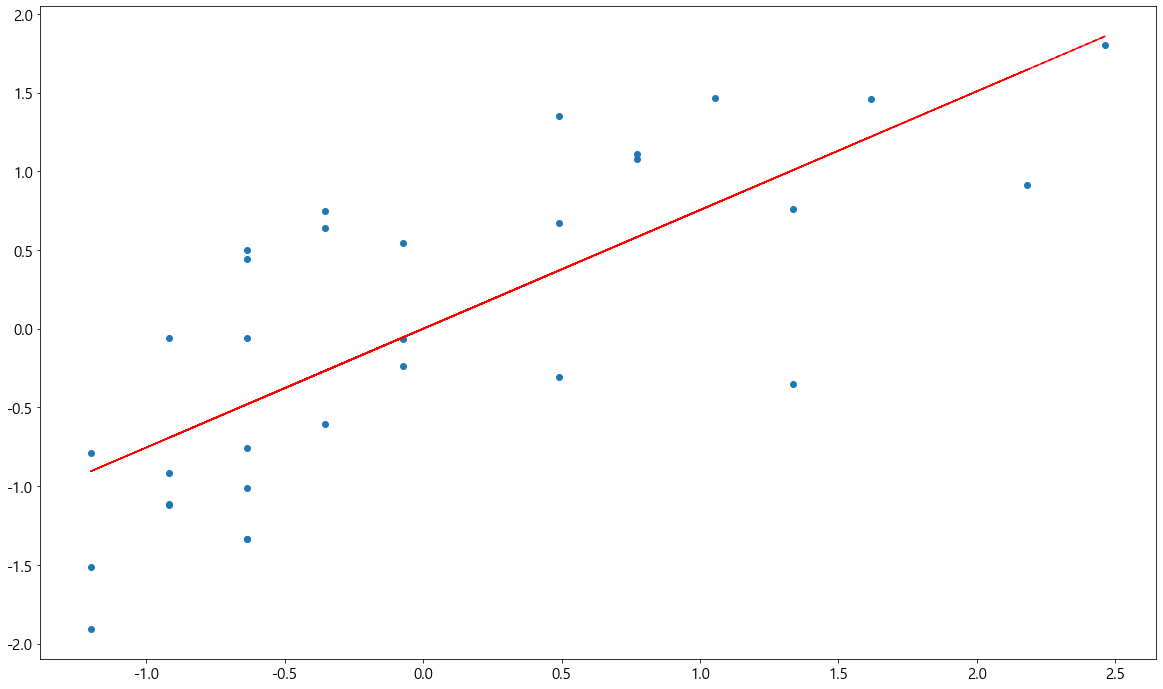

In [170]:
plt.scatter( x_data, y_data)
plt.plot(x_data, hxFn(x_data), 'r--')
plt.show()

### Keras version

In [171]:
import tensorflow as tf
import numpy as np
import pandas as pd


# 케라스에서 할 때 필요한 것
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [172]:
dense = Dense( units=1, input_dim=1)                 
    
model = Sequential( [dense] )                         

model.compile( loss='mse', optimizer=Adam(0.01) )    

h = model.fit( x_data, y_data, epochs=500)           

Epoch 1/500
1/1 [==============================] - 0s 140ms/step - loss: 4.7572
Epoch 2/500
1/1 [==============================] - 0s 0s/step - loss: 4.7157
Epoch 3/500
1/1 [==============================] - 0s 997us/step - loss: 4.6744
Epoch 4/500
1/1 [==============================] - 0s 997us/step - loss: 4.6333
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 4.5925
Epoch 6/500
1/1 [==============================] - 0s 997us/step - loss: 4.5518
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 4.5113
Epoch 8/500
1/1 [==============================] - 0s 997us/step - loss: 4.4711
Epoch 9/500
1/1 [==============================] - 0s 998us/step - loss: 4.4311
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 4.3914
Epoch 11/500
1/1 [==============================] - 0s 2ms/step - loss: 4.3518
Epoch 12/500
1/1 [==============================] - 0s 2ms/step - loss: 4.3125
Epoch 13/500
1/1 [==============================] 

1/1 [==============================] - 0s 998us/step - loss: 1.7735
Epoch 104/500
1/1 [==============================] - 0s 999us/step - loss: 1.7559
Epoch 105/500
1/1 [==============================] - 0s 997us/step - loss: 1.7384
Epoch 106/500
1/1 [==============================] - 0s 997us/step - loss: 1.7212
Epoch 107/500
1/1 [==============================] - 0s 997us/step - loss: 1.7041
Epoch 108/500
1/1 [==============================] - 0s 996us/step - loss: 1.6872
Epoch 109/500
1/1 [==============================] - 0s 2ms/step - loss: 1.6705
Epoch 110/500
1/1 [==============================] - 0s 998us/step - loss: 1.6540
Epoch 111/500
1/1 [==============================] - 0s 2ms/step - loss: 1.6377
Epoch 112/500
1/1 [==============================] - 0s 2ms/step - loss: 1.6215
Epoch 113/500
1/1 [==============================] - 0s 2ms/step - loss: 1.6055
Epoch 114/500
1/1 [==============================] - 0s 2ms/step - loss: 1.5897
Epoch 115/500
1/1 [=====================

1/1 [==============================] - 0s 997us/step - loss: 0.7282
Epoch 204/500
1/1 [==============================] - 0s 2ms/step - loss: 0.7232
Epoch 205/500
1/1 [==============================] - 0s 2ms/step - loss: 0.7182
Epoch 206/500
1/1 [==============================] - 0s 997us/step - loss: 0.7133
Epoch 207/500
1/1 [==============================] - 0s 997us/step - loss: 0.7085
Epoch 208/500
1/1 [==============================] - 0s 2ms/step - loss: 0.7037
Epoch 209/500
1/1 [==============================] - 0s 997us/step - loss: 0.6991
Epoch 210/500
1/1 [==============================] - 0s 998us/step - loss: 0.6945
Epoch 211/500
1/1 [==============================] - 0s 998us/step - loss: 0.6899
Epoch 212/500
1/1 [==============================] - 0s 998us/step - loss: 0.6854
Epoch 213/500
1/1 [==============================] - 0s 998us/step - loss: 0.6810
Epoch 214/500
1/1 [==============================] - 0s 997us/step - loss: 0.6767
Epoch 215/500
1/1 [=================

1/1 [==============================] - 0s 2ms/step - loss: 0.4743
Epoch 304/500
1/1 [==============================] - 0s 998us/step - loss: 0.4734
Epoch 305/500
1/1 [==============================] - 0s 997us/step - loss: 0.4724
Epoch 306/500
1/1 [==============================] - 0s 998us/step - loss: 0.4716
Epoch 307/500
1/1 [==============================] - 0s 998us/step - loss: 0.4707
Epoch 308/500
1/1 [==============================] - 0s 998us/step - loss: 0.4698
Epoch 309/500
1/1 [==============================] - 0s 997us/step - loss: 0.4690
Epoch 310/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4682
Epoch 311/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4674
Epoch 312/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4666
Epoch 313/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4658
Epoch 314/500
1/1 [==============================] - 0s 998us/step - loss: 0.4650
Epoch 315/500
1/1 [=====================

1/1 [==============================] - 0s 998us/step - loss: 0.4346
Epoch 405/500
1/1 [==============================] - 0s 998us/step - loss: 0.4345
Epoch 406/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4344
Epoch 407/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4343
Epoch 408/500
1/1 [==============================] - 0s 998us/step - loss: 0.4342
Epoch 409/500
1/1 [==============================] - 0s 997us/step - loss: 0.4341
Epoch 410/500
1/1 [==============================] - 0s 998us/step - loss: 0.4341
Epoch 411/500
1/1 [==============================] - 0s 997us/step - loss: 0.4340
Epoch 412/500
1/1 [==============================] - 0s 997us/step - loss: 0.4339
Epoch 413/500
1/1 [==============================] - 0s 998us/step - loss: 0.4338
Epoch 414/500
1/1 [==============================] - 0s 997us/step - loss: 0.4337
Epoch 415/500
1/1 [==============================] - 0s 997us/step - loss: 0.4336
Epoch 416/500
1/1 [===============

In [188]:
model.predict( [5] )

array([[3.6917357]], dtype=float32)

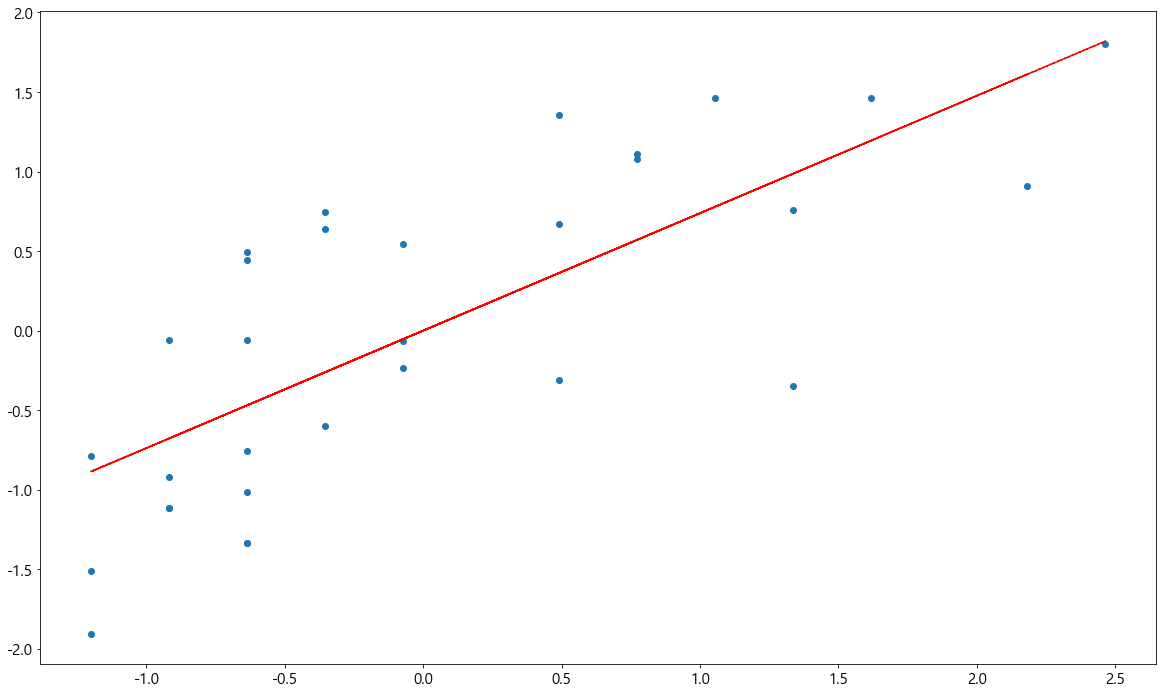

In [174]:
plt.scatter( x_data, y_data)
plt.plot(x_data, model.predict(x_data), 'r--')
plt.show()